# Explore the MDM spectra! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

### read in the data, using `getdata` for the background image cause I dont need to see its header

In [2]:
hdu = fits.open('b.0580.fits')
bg = fits.getdata('b.0576.fits')
hdu.info()

Filename: b.0580.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   (4128, 1016)   int16 (rescales to uint16)   


get the data and the header and explore the header (`IMAGETYP= 'OBJECT  '` and `DISPID  = 'Blue Grism'` tell me this is a "science" image. 

In [3]:
header = hdu['PRIMARY'].header
data = hdu['PRIMARY'].data
header

SIMPLE  =                    T /                                                
BITPIX  =                   16 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 4128 /                                                
NAXIS2  =                 1016 /                                                
BSCALE  =                    1 / PHYSICAL=INTEGER*BSCALE+BZERO                  
BZERO   =                32768 /                                                
GROUP   =                    0 /                                                
COMMENT  Detector Information                                                   
DETECTOR= 'STA0500A ITL5339'   / Detector name                                  
GAINDL  =                   32 / Pixel integration time, in sequencer clocks    
PIXITIME=            9.9000E-6 / Pixel integration time, in seconds             
CCDXBIN =                   

### Explore the data

In [4]:
data.shape

(1016, 4128)

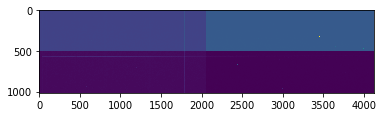

In [5]:
plt.imshow(data, vmin=2441, vmax=4235)

### Slice across the dispersion axis (slice along the spatial axis)

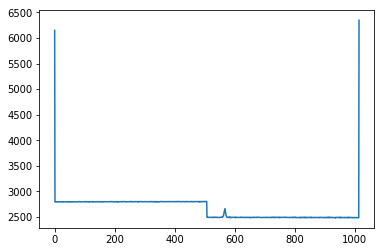

In [6]:
plt.plot(data[:,1000])

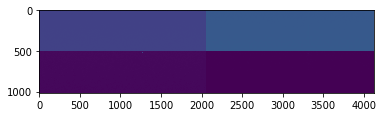

In [7]:
plt.imshow(bg, vmin=2441, vmax=4235)

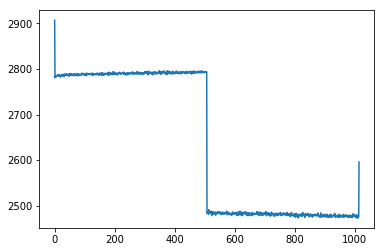

In [8]:
plt.plot(bg[:,1000])

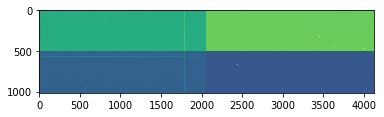

In [9]:
plt.imshow(data, vmin=data.mean()-500, vmax=data.mean()+500)

### Subtract the background to get rid of the detector/amplifier bias

see some cosmic rays/hot pixels

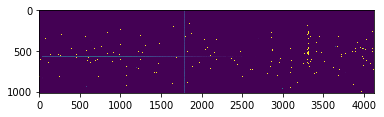

In [10]:
clean = data-bg
plt.imshow(data-bg, vmin=(data-bg).mean()/20,vmax=(data-bg).mean())

### trace the object along the dispersion axis (approximate)

we are just gonna sum around this hump in the spatial axis all along the detector

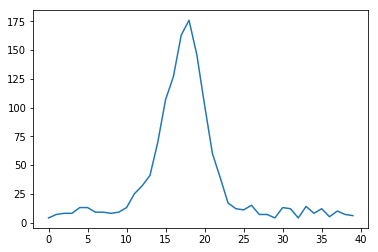

In [11]:
plt.plot(clean[550:590,1000])

### See the spectrum

(0, 1100)

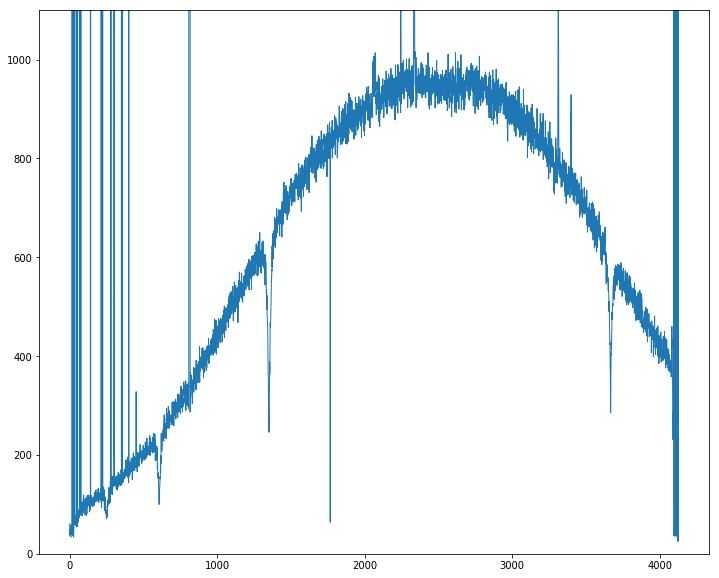

In [12]:
plt.figure(figsize=(12,10))
spec = np.flip(np.sum(clean[562:570,:], axis=0))
plt.plot(spec, lw=1.0)
plt.ylim(0,1100)


### Find teh wavelength solution
use the balmer lines

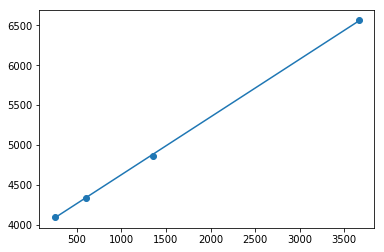

In [13]:
pix= [250, 605, 1351, 3668]
wv = [4101, 4340, 4861, 6564]
m,b = np.polyfit(pix, wv, 1)
plt.scatter(pix, wv)
plt.plot(pix, m*np.array(pix) + b)

In [14]:
wave = m*np.arange(data.shape[1]) + b

(0, 200)

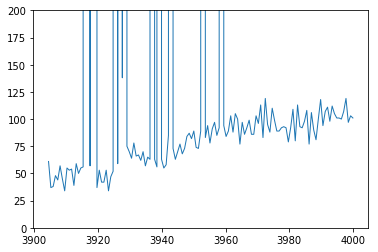

In [15]:
caII = np.where((wave > 3900) & (wave < 4000))[0]
plt.plot(wave[caII], spec[caII], lw=1.0)
plt.ylim(0,200)

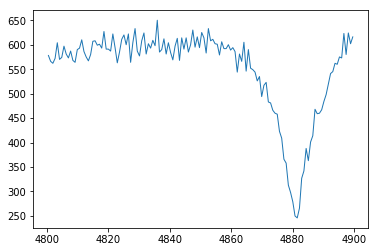

In [16]:
hbeta = np.where((wave > 4800) & (wave < 4900))[0]
plt.plot(wave[hbeta], spec[hbeta], lw=1.0)
# plt.ylim(750,1000)

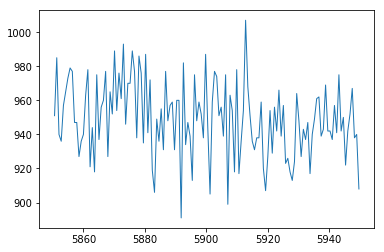

In [17]:
naI = np.where((wave > 5850) & (wave < 5950))[0]
plt.plot(wave[naI], spec[naI], lw=1.0)

### More advanced exploration of spectra using linetools

In [18]:
from linetools.spectra.xspectrum1d import XSpectrum1D

In [19]:
xspec = XSpectrum1D(wave, spec)

/Users/mwilde/python/linetools/linetools/spectra/xspectrum1d.py:254: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


### Setting `xspec=True` brings up the GUI

In [20]:
xspec.plot(xspec=True)

/Users/mwilde/python/linetools/linetools/spectra/xspectrum1d.py:356: UserWarning: This spectrum does not contain an input error array
  warnings.warn("This spectrum does not contain an input error array")


button=1, x=2298.000000, y=1098.000000, xdata=6676.748354, ydata=892.004
